# eda
Given time pressure, pandas_profiling library will be mostly used to run eda. This will help better understand the data and decide on transformations and feature engineering needed.


## Summary of findings, actions, assumptions, etc.
### HL summary
- no missing values nor duplicates - rare in real life scenario but we are using simulated data
- presence of outliers in many features such as balances, amounts etc. -> consider wasy to handle outliers
- feature standardisation required to address skew in many raw features
- 0.1% of isFraud == True -> highly imbalanced classification problem
- correlation between various "balance" features, as expected

### Opportunities for feature engineering
- step field should be translated into day and hour (assumption: start from day 1, hour 1) to be able to incorporate seasonality information in the model (e.g. day of the week, hour of the day etc.)
- customer level summary features (e.g. # of transactions, etc.) at both transaction origin and destination could be benefitial to flag fraud
- isMerchant based on whether customer ID starts with M (which also means there will be no information for them)

### Minor points
- looks like step 744 is missing which could be added in future exercise
- transactions appear once which is good news (e.g. cash out transaction does not appear as cash in with inverted customer origin vs. destination information).   
  E.g.: df[df["amount"]==143236.26]
  
### Assumptions
Currency is the same across all transactions
No refunds (though could be checked with further analysis)

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport


In [2]:
# Import input dataset - source: https://www.kaggle.com/ealaxi/paysim1
df = pd.read_csv("../data/input_data.csv")
print("File size:", df.shape[0])
df.head()

File size: 6362620


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Let's quickly look at how much fraud accounts for

In [3]:
fraud = df[df["isFraud"] == 1]
nonfraud = df[df["isFraud"] == 0]

amt_fraud = sum(fraud["amount"])
amt_nonfraud = sum(nonfraud["amount"])

print(f"Total volume of fraud: {fraud.shape[0]}, out of {nonfraud.shape[0]}, i.e. {fraud.shape[0]/nonfraud.shape[0]}")
print(f"Total amount of fraud: {amt_fraud}, out of a total of  which accounts to {amt_fraud/amt_nonfraud}")

Total volume of fraud: 8213, out of 6354407, i.e. 0.0012924888191769902
Total amount of fraud: 12056415427.839998, out of a total of  which accounts to 0.0106473783327946


So 1% in amount, not negligible at all especially compared that it is 0.1% in volume!

Now let's look at time distributions:

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


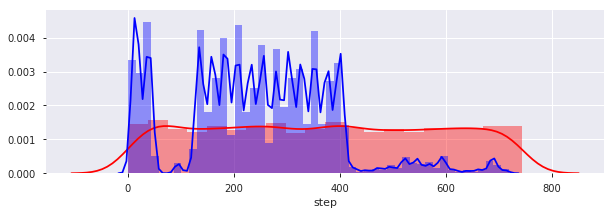

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.distplot(fraud.step, label="Fraud", color="red")
sns.distplot(nonfraud.step, label='Non Fraud', color = "blue")

Very curious - looks like they do not follow genuine transactions patterns, most likely due to them being automatically generated.

In [3]:
report = ProfileReport(df)
report

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWar

In [4]:
report.to_file('1-eda-input-dataset.html')